In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing the dataset

In [3]:
df = pd.read_csv('../input/aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Checking null values

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

We have many features and many columns with null-values so one way is to drop columns such as gender, company_size and company_type but then this would not become a real world problem. Because we would always get some null values. Thus we would fill them by "None".

## Exploring the target

In [5]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

Since, the data is skewed we would be using AUC score as metrics rather than normal accuracy.

## Data type of each column

In [6]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

## Let us make some graphs to understand things better****

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

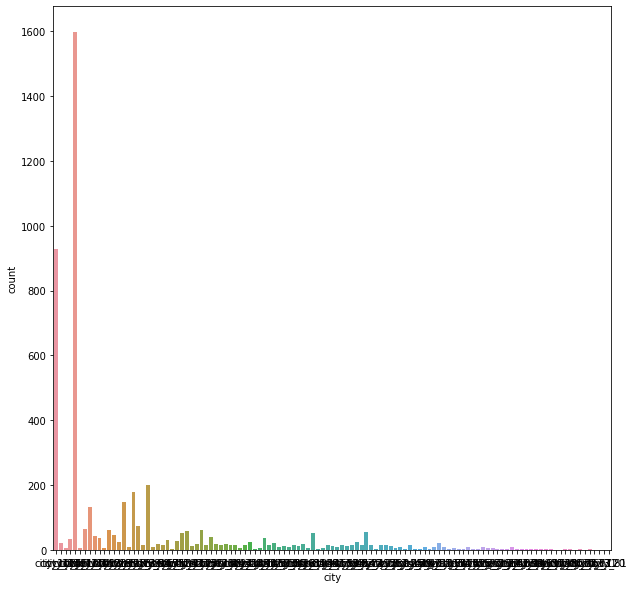

In [8]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='city',orient='v')

We can see that count of one city is much much more than other cities.

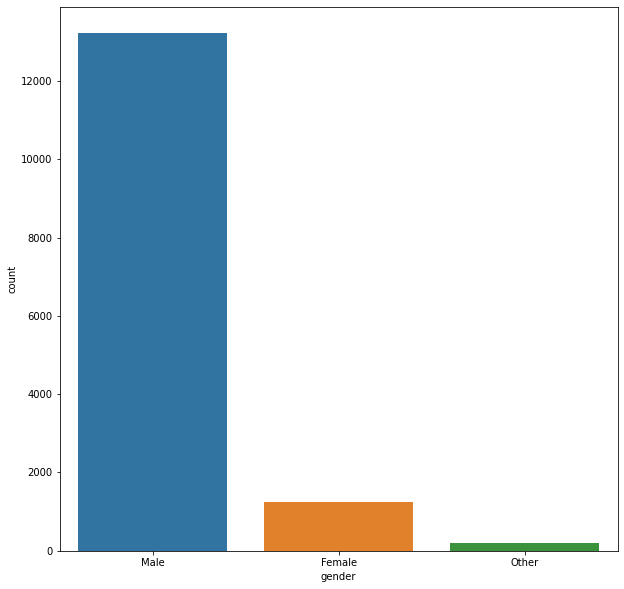

In [9]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df,x='gender')

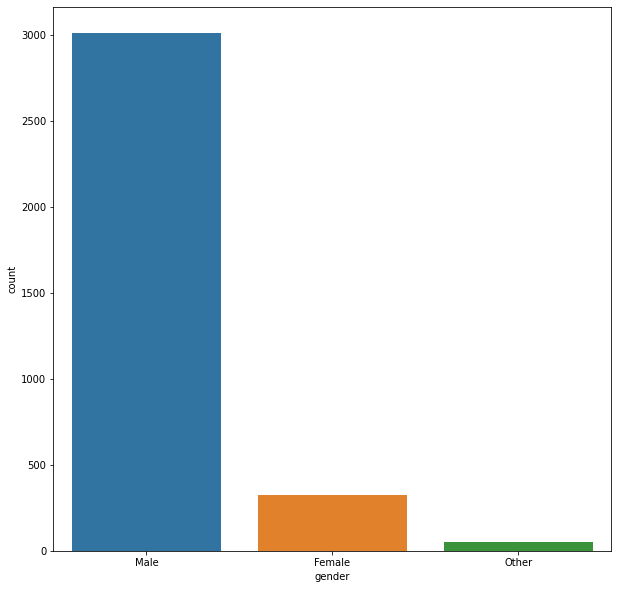

In [10]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='gender')

We can see that the number of males are more than any other in sex and they are also high in proportion inleaving the job.

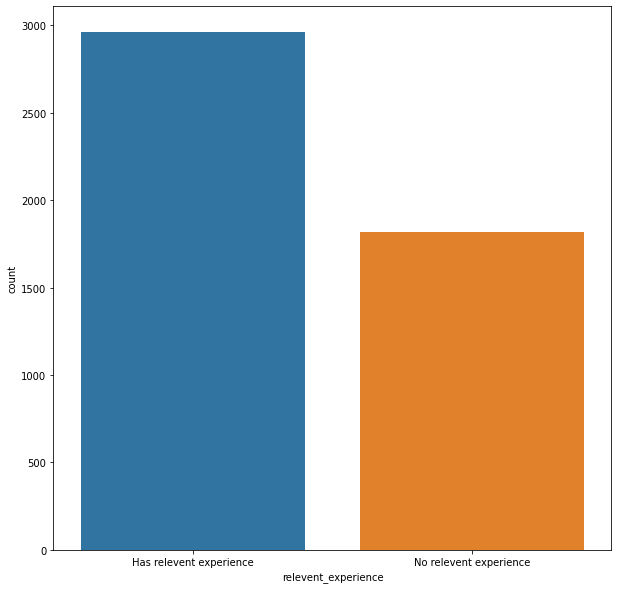

In [11]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='relevent_experience')

Number of people searching for job with relevant expierience is much more than those searching without experience. 

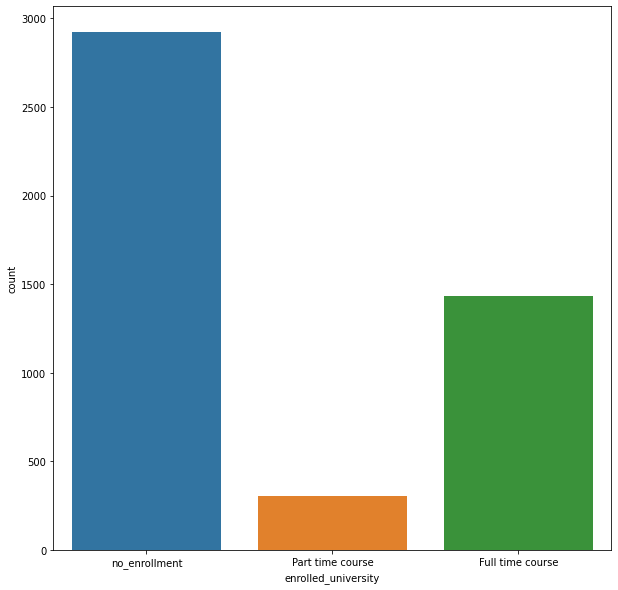

In [12]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='enrolled_university')

People who did not go to college are much much larger group who are now searching for a job change.

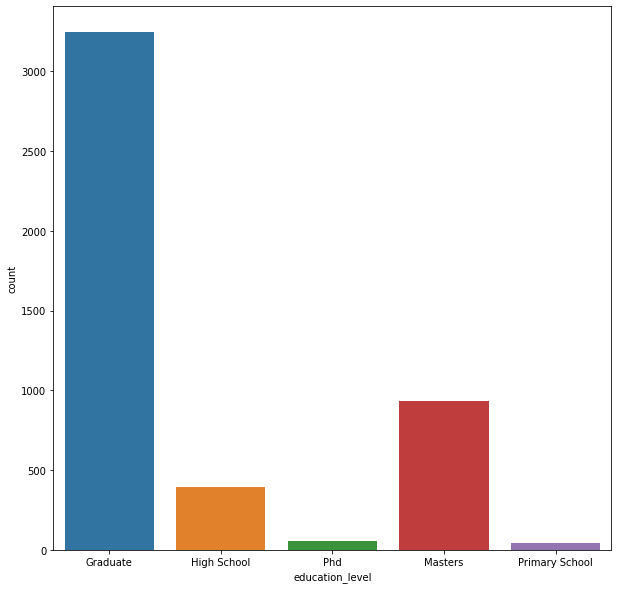

In [13]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='education_level')

The two features education_level and enrollment are very much interrelated we are going to drop one of them. Since education_level has more NA values then enrollement we would be dropping education_level.

In [14]:
df = df.drop(['education_level'],axis=1)

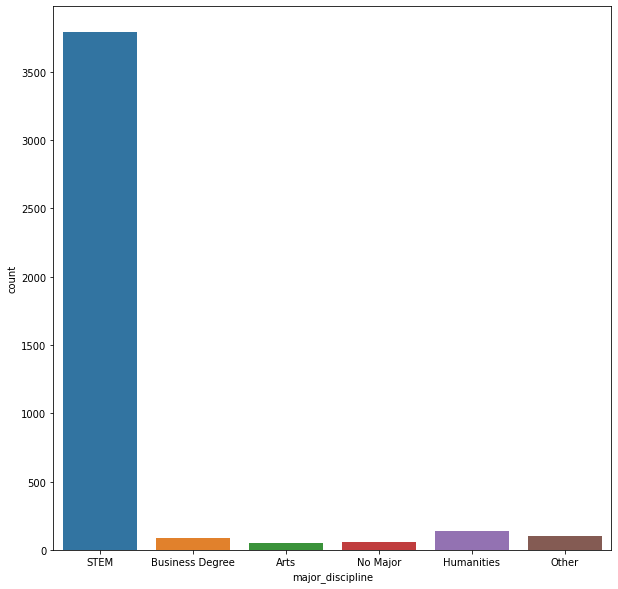

In [15]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='major_discipline')

We find that people with professional degree are more likely to search for a new job.

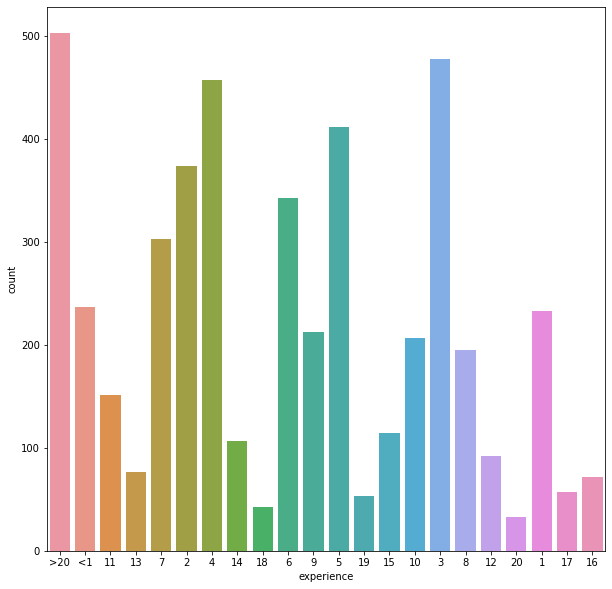

In [16]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='experience')

We would be dropping expereince column as we already have relevant experience column and we would be using that

In [17]:
df = df.drop(['experience'],axis=1)

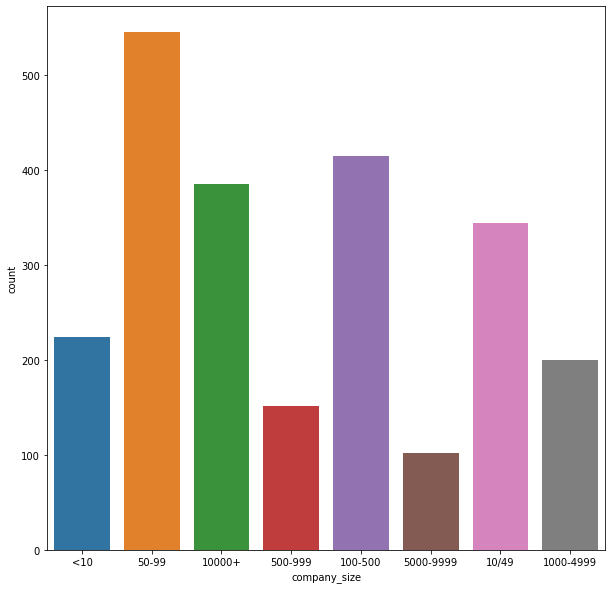

In [18]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='company_size')

People having jobs in in startups are more likely to change job much more than people working in corporates.

Let us create a new column which would divide this into four categories startups, medium, large and None for companies whose size is unknown.

In [19]:
df['company_size_new']= "None"

for i in df['company_size'].values:
    if i in ['<10','10/49','50-99']:
        df['company_size_new'][df['company_size']==i]='small'
    elif i in ['100-500','500-999']:
        df['company_size_new'][df['company_size']==i]='medium'
    elif i in ['1000-4999','5000-9999','10000+']:
        df['company_size_new'][df['company_size']==i]='big'

df = df.drop(['company_size'],axis=1)      

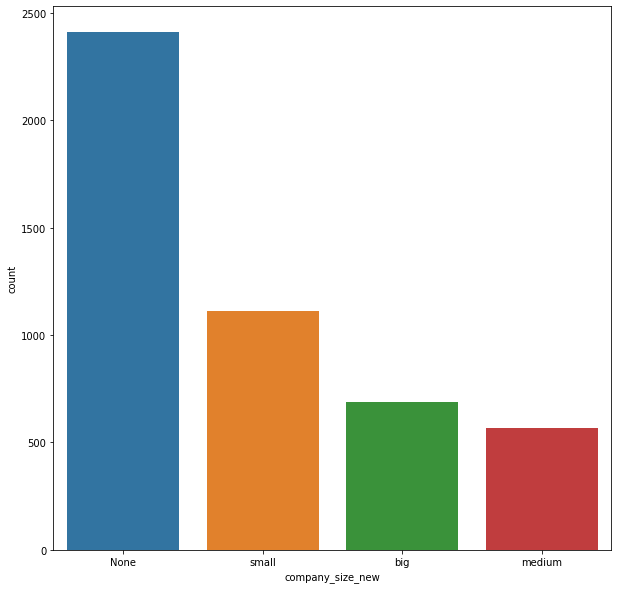

In [20]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='company_size_new')

Now this looks much a clear picture.

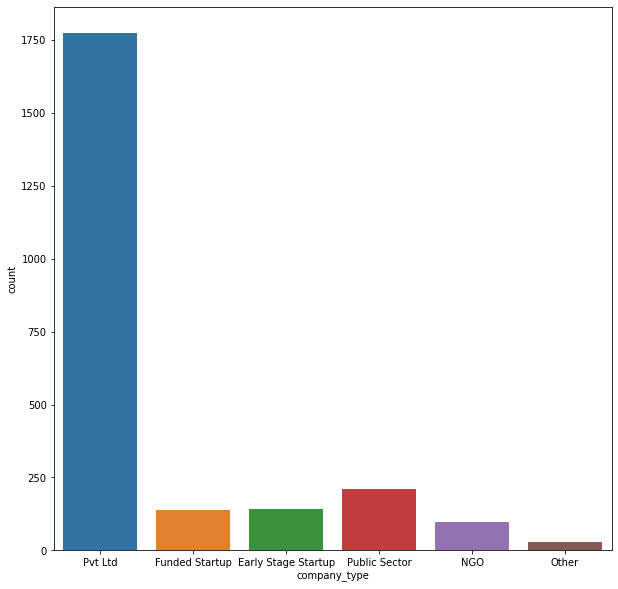

In [21]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df[df.target==1],x='company_type')

Since people are likely to leave job more in pvt ltd. 

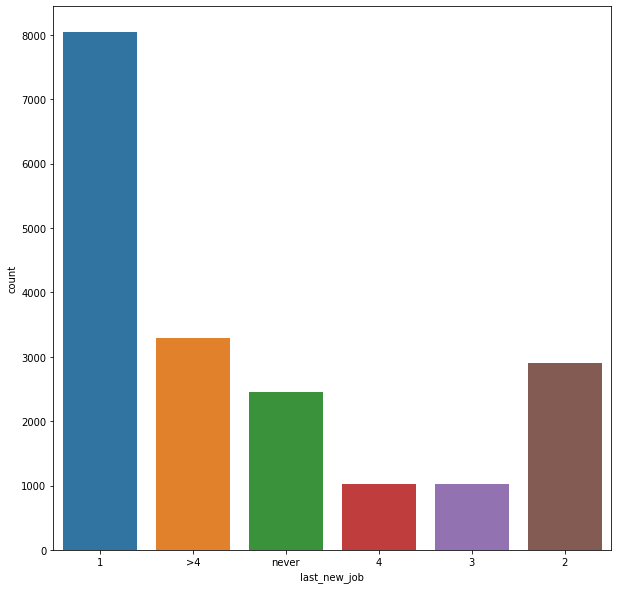

In [22]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax = sns.countplot(data=df,x='last_new_job')

## Building the model

In [23]:
columns = [f for f in df.columns if f not in ('enrollee_id','target')]
numerical_columns = ['city_development_index','training_hours']

In [24]:
from sklearn.preprocessing import LabelEncoder

We would be using label encoding in place of OneHotEncoding

In [25]:
for col in columns:
    if col not in numerical_columns:
        df[col] = df[col].astype(str).fillna("None")
        lbl = LabelEncoder()
        lbl.fit(df[col])
        df[col]= lbl.transform(df[col])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [27]:
X = df[columns].values 
y = df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [28]:
rf = RandomForestClassifier(criterion='gini',max_depth=7,n_estimators = 400)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=400)

In [29]:
y_pred= rf.predict_proba(X_test)[:,1]

In [30]:
print('ROC AUC SCORE: {:.3f}'.format(roc_auc_score(y_test,y_pred)))

ROC AUC SCORE: 0.801


# This is a good score as we have not done overfitting and not excluded too much training data. Also, we can add more and more complexity to the model but it would hardly import result